In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import random
import glob
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from numpy import expand_dims, argmax

%matplotlib inline

### **Pre-processing Potsdam dataset**

In [2]:
flat_random = random.sample(range(1, 4000), 200)
gable_random = random.sample(range(1, 4000), 200)
hip_random = random.sample(range(1, 4000), 200)
print(flat_random)
print(gable_random)
print(hip_random)

[272, 2600, 407, 3668, 2128, 2190, 1697, 2997, 1616, 2865, 2694, 3259, 981, 3276, 1945, 929, 3815, 3312, 986, 2856, 3051, 2191, 935, 437, 1347, 3485, 2236, 427, 1929, 1888, 2144, 1357, 697, 1951, 2433, 3555, 2571, 2046, 3889, 1009, 643, 3610, 2842, 169, 1615, 1145, 3248, 1211, 3793, 3004, 1917, 2325, 1269, 125, 2305, 1714, 847, 3447, 3487, 486, 452, 3035, 2198, 3022, 1425, 2312, 2536, 1132, 563, 1982, 2607, 1013, 280, 957, 830, 2177, 1286, 2066, 2569, 3311, 881, 3234, 2775, 883, 1696, 1530, 2698, 2604, 1798, 1818, 3876, 3794, 2943, 1005, 1178, 3496, 3265, 792, 466, 3587, 954, 2121, 2477, 177, 26, 2221, 1600, 2354, 1076, 580, 2953, 786, 1694, 3532, 3093, 3956, 2708, 3359, 3367, 1026, 2823, 2182, 1246, 2872, 1892, 1493, 948, 2669, 1870, 3249, 3228, 3728, 1068, 479, 1087, 3574, 1961, 3839, 3503, 540, 439, 548, 2480, 3197, 2673, 185, 3489, 2097, 1358, 3040, 1431, 2642, 158, 1159, 97, 3843, 2026, 2689, 202, 2838, 689, 2223, 1193, 1481, 1124, 1789, 1472, 3810, 987, 2915, 1680, 2635, 137, 206

In [3]:
potsdam_image_paths_list = []
potsdam_image_labels = []
image_path_flat = '../input/potsdam-full/potsdam-roofs/Dataset 2/Flat/'
image_path_gable = '../input/potsdam-full/potsdam-roofs/Dataset 2/Gable/'
image_path_hip = '../input/potsdam-full/potsdam-roofs/Dataset 2/Hip/'

for i in range(len(flat_random)):
    potsdam_image_paths_list.append(image_path_flat + "Flat" + str(flat_random[i]) + ".tif")
    potsdam_image_labels.append(0)
    
for i in range(len(gable_random)):
    potsdam_image_paths_list.append(image_path_gable + "Gable" + str(gable_random[i]) + ".tif")
    potsdam_image_labels.append(1)
    
for i in range(len(hip_random)):
    potsdam_image_paths_list.append(image_path_hip + "Hip" + str(hip_random[i]) + ".tif")
    potsdam_image_labels.append(2)
# print(image_paths_list)

In [4]:
# potsdam_image_paths_list = []
# potsdam_image_labels = []
# potsdam_image_path_flat = '../input/potsdam-mini/potsdam-mini/Flat'   # 0
# potsdam_image_path_gable = '../input/potsdam-mini/potsdam-mini/Gable' # 1
# potsdam_image_path_hip = '../input/potsdam-mini/potsdam-mini/Hip'     # 2



# for img_path in glob.glob(os.path.join(potsdam_image_path_flat, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path)) 
#     potsdam_image_labels.append(0)

# for img_path in glob.glob(os.path.join(potsdam_image_path_gable, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path))
#     potsdam_image_labels.append(1)

# for img_path in glob.glob(os.path.join(potsdam_image_path_hip, '*.tif')):
#     potsdam_image_paths_list.append(str(img_path)) 
#     potsdam_image_labels.append(2)
    
# potsdam_image_paths_list.sort()
# assert(len(potsdam_image_paths_list) == 300 and len(potsdam_image_labels) == 300)

In [5]:
zipped_list = list(zip(potsdam_image_paths_list, potsdam_image_labels))
random.shuffle(zipped_list)
potsdam_image_paths_list, potsdam_image_labels = zip(*zipped_list)
potsdam_image_paths_list, potsdam_image_labels = list(potsdam_image_paths_list), list(potsdam_image_labels)

In [6]:
# mini_image_paths_list = []
# mini_labels = []

# for i in range(0,10,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(0)
    
# for i in range(100,110,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(1)
    
# for i in range(200,210,1):
#     mini_image_paths_list.append(potsdam_image_paths_list[i])
#     mini_labels.append(2)
    
# print(mini_image_paths_list)
# print(mini_labels)

In [7]:
# train_X_potsdam = []
# train_Y_potsdam = []
# for i, img in enumerate(mini_image_paths_list):
#     img = cv2.imread(img, cv2.IMREAD_COLOR)
#     resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
#     train_X_potsdam.append(resized_img)
    
# train_Y_potsdam = mini_labels

train_X_potsdam = []
train_Y_potsdam = []
for i, img in enumerate(potsdam_image_paths_list):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    resized_img = cv2.resize(img,(256, 256), interpolation = cv2.INTER_CUBIC)
    train_X_potsdam.append(resized_img)
    
train_Y_potsdam = potsdam_image_labels

In [8]:
train_X_potsdam = np.array(train_X_potsdam)
train_Y_potsdam = np.array(train_Y_potsdam)

train_X_potsdam = train_X_potsdam.astype('float32')
train_X_potsdam /= 255.
train_Y_potsdam = train_Y_potsdam.reshape(train_Y_potsdam.shape[0],1)
train_Y_potsdam = to_categorical(train_Y_potsdam, num_classes = 3)

print(train_X_potsdam.shape, train_Y_potsdam.shape)

(600, 256, 256, 3) (600, 3)


### **Make predictions**

In [9]:
def make_predictions(model, test_X, test_Y):
    test_loss = model.evaluate(test_X, test_Y)
    predictions = model.predict(test_X)
    pred_labels = np.argmax(predictions, axis = 1)
    test_labels = np.argmax(test_Y, axis = 1)
    return pred_labels, test_labels

### **Plot confusion matrix**

In [10]:
def plot_confusion_matrix(test_labels, pred_labels):
    Y_test_actual = test_labels
    Y_test_pred = pred_labels
    confusion_mtx = confusion_matrix(Y_test_actual, Y_test_pred) 

    f,ax = plt.subplots(figsize = (8, 8))
    sns.heatmap(confusion_mtx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = '.1f', ax = ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

### **Classification Report**

In [11]:
def print_classification_report(test_labels, pred_labels):
    print("Classification Report: ")
    print(classification_report(test_labels, pred_labels))

### **Plot AUC-ROC graph**

In [12]:
def plot_AUC_ROC(model, test_X, test_Y):

    predictions = model.predict(test_X) 
    print(predictions)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    print("ROC_AUC score for 3 models: {0}".format(roc_auc))

    # Plot of a ROC curve for a specific class
    for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

### **TTA**

In [13]:
# make a prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
    # convert image into dataset
    samples = expand_dims(image, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=n_examples)
    # make predictions for each augmented image
    yhats = model.predict_generator(it, steps=n_examples, verbose=0)
    # sum across predictions
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    return argmax(summed)

In [14]:
# evaluate a model on a dataset using test-time augmentation
def tta_evaluate_model(model, test_X, test_Y):
    # configure image data augmentation
    datagen = ImageDataGenerator( rotation_range = 7,  # randomly rotate images in the range (degrees, 0 to 180)
                                  width_shift_range = 0.10,  # randomly shift images horizontally (fraction of total width)
                                  height_shift_range = 0.10,  # randomly shift images vertically (fraction of total height)
                                  horizontal_flip = True,  # randomly flip images
                                  vertical_flip = True,   # randomly flip images
                                  fill_mode = 'reflect')
    # define the number of augmented images to generate per test set image
    n_examples_per_image = 5
    yhats = list()
    for i in range(len(test_X)):
        # make augmented prediction
        yhat = tta_prediction(datagen, model, test_X[i], n_examples_per_image)
        # store for evaluation
        yhats.append(yhat)
    # calculate accuracy
    print(yhats)
    testY_labels = argmax(test_Y, axis=1)
    acc = accuracy_score(testY_labels, yhats)
    print_classification_report(test_labels, yhats)
    plot_confusion_matrix(testY_labels, yhats)
    return acc, yhats

### **Testing on ResNet model**

2022-04-21 03:04:05.265499: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 03:04:05.391555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 03:04:05.392926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-21 03:04:05.394531: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

19/19 [==============================] - 10s 87ms/step - loss: 1.9522 - acc: 0.6583
[1 1 0 1 2 1 0 0 0 0 0 0 1 0 0 2 1 0 2 0 0 0 0 1 2 0 0 2 0 0 0 2 0 0 0 0 2
 0 0 0 1 0 0 0 1 0 1 2 0 2 0 0 1 0 2 0 1 2 0 2 1 0 1 0 0 0 1 0 2 0 0 0 2 0
 2 2 0 2 0 0 0 1 0 0 0 0 2 2 1 0 2 2 2 1 2 1 0 2 0 0 0 2 0 0 0 0 1 0 2 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 2 0 0 1 0 0 0 0 0 2 1 1 2 2 0 1 1 0 1 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 1 0 0 2 0 2 2 2 0 0 0 2 1 2 0 2 0 0
 0 1 0 0 0 2 2 0 0 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1
 0 1 2 0 0 0 1 0 1 1 0 0 1 2 0 2 2 0 0 1 2 0 1 1 0 2 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 2 2 1 2 1 0 0 0 1 2 0 0 0 0 1 0 1 0 0 1 1 0 2 0 2 0 0 2 0 0 1
 0 0 1 2 0 1 0 0 2 0 1 0 0 0 0 0 0 1 0 0 2 0 2 0 0 1 2 0 2 0 0 0 0 0 0 2 0
 0 1 0 1 0 0 0 0 2 0 1 0 0 2 0 0 0 0 0 0 1 0 1 0 1 0 0 2 2 1 0 0 0 0 0 2 2
 2 0 2 0 2 2 0 0 0 0 0 0 1 0 0 0 2 0 2 0 0 1 2 0 0 0 0 0 1 2 0 2 0 2 1 2 0
 0 0 2 1 0 0 0 0 0 2 1 0 2 2 2 0 0 1 0 1 2 0 0 0 0 0 2 1 1 0 0 0 2 0 2 1 0
 0 0 1 1 1 0 1 1

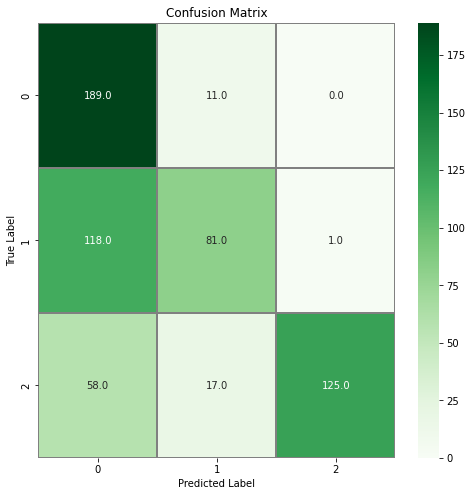

[[1.7506206e-01 8.2493794e-01 1.2315331e-08]
 [7.4745859e-03 9.9250549e-01 1.9919667e-05]
 [7.0906919e-01 2.9093015e-01 6.7006852e-07]
 ...
 [9.9689591e-01 3.0982203e-03 5.8786600e-06]
 [7.0985663e-01 1.2616965e-02 2.7752641e-01]
 [9.9871159e-01 1.2860114e-03 2.3217613e-06]]
ROC_AUC score for 3 models: {0: 0.9022937499999999, 1: 0.8139375, 2: 0.9423250000000001}


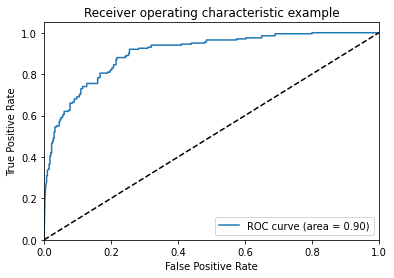

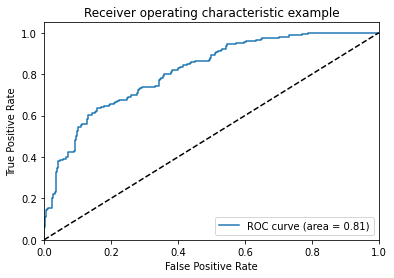

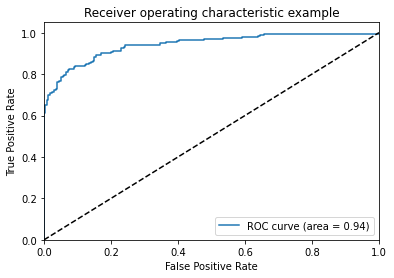

In [15]:
ResNet = tf.keras.models.load_model('../input/weights-mod-dataset/weights-mod-data/ResNet50-finetuning-bs-8-mod')
test_loss_ResNet = ResNet.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_ResNet = ResNet.predict(train_X_potsdam)
pred_labels_ResNet = np.argmax(predictions_ResNet, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_ResNet)
print(test_labels)
print(test_loss_ResNet)
print_classification_report(test_labels, pred_labels_ResNet)
plot_confusion_matrix(test_labels, pred_labels_ResNet)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with ResNet**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 

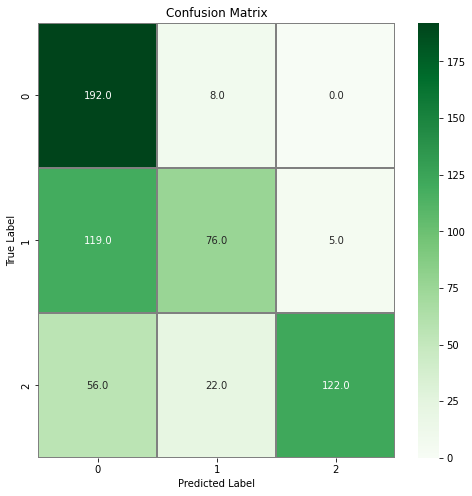

0.65


In [16]:
acc_ResNet_TTA, yhats_ResNet_TTA = tta_evaluate_model(ResNet, train_X_potsdam, train_Y_potsdam)
print(acc_ResNet_TTA)

### **Testing with shallow CNN**

19/19 [==============================] - 4s 135ms/step - loss: 1.6112 - acc: 0.5333
[0 2 2 2 2 2 0 0 0 2 0 0 2 2 0 2 0 0 0 2 2 2 0 0 2 2 2 2 0 2 2 2 2 2 2 0 2
 0 0 2 2 2 0 0 2 2 2 2 0 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 0 0 2 0 2 0 0 2 2 0
 2 0 2 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 2 2 0 2 0 0 2 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 0 0 2 2 0 0 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2
 0 0 2 2 0 0 0 2 2 2 2 1 2 2 0 2 0 0 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 2 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 2 2 0 2 0 2 2 2 2 2 0 0 0 0 2
 2 2 2 1 2 2 0 2 2 2 0 2 2 0 2 2 2 0 2 0 2 0 2 2 0 2 2 0 2 0 0 2 0 0 0 2 2
 2 0 2 0 2 2 2 2 0 2 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 0 0 2 2
 2 2 2 2 0 0 0 2 2 2 2 0 1 2 2 2 0 2 0 2 2 2 2 2 0 0 2 0 2 2 0 2 2 0 0 2 2
 2 2 0 2 2 0 2 0 2 0 2 0 2 0 0 2 2 2 2 0 2 0 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2
 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 2 2 0 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 0 2 2 2
 2 0 2 0 2 2 1 0 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 0
 2 0 2 2 0 0 2 0

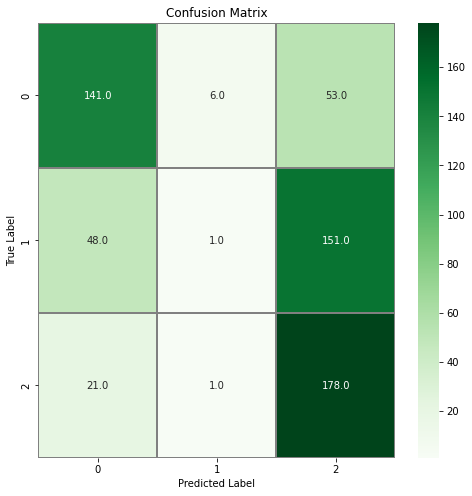

[[1.7506206e-01 8.2493794e-01 1.2315331e-08]
 [7.4745859e-03 9.9250549e-01 1.9919667e-05]
 [7.0906919e-01 2.9093015e-01 6.7006852e-07]
 ...
 [9.9689591e-01 3.0982203e-03 5.8786600e-06]
 [7.0985663e-01 1.2616965e-02 2.7752641e-01]
 [9.9871159e-01 1.2860114e-03 2.3217613e-06]]
ROC_AUC score for 3 models: {0: 0.9022937499999999, 1: 0.8139375, 2: 0.9423250000000001}


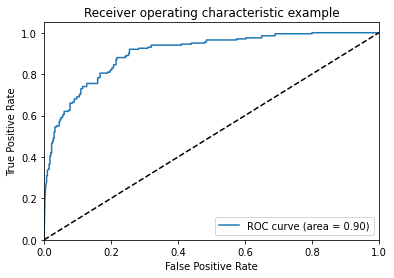

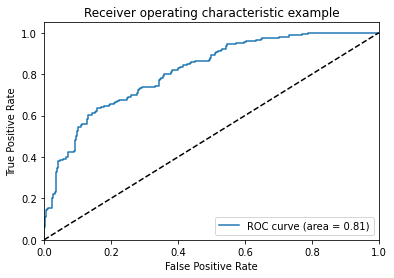

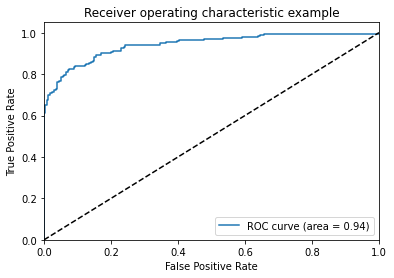

In [17]:
CNN = tf.keras.models.load_model('../input/weights-mod-dataset/weights-mod-data/CNN-RMSProp-mod')
test_loss_CNN = CNN.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_CNN = CNN.predict(train_X_potsdam)
pred_labels_CNN = np.argmax(predictions_CNN, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_CNN)
print(test_labels)
print(test_loss_CNN)
print_classification_report(test_labels, pred_labels_CNN)
plot_confusion_matrix(test_labels, pred_labels_CNN)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with shallow CNN**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 

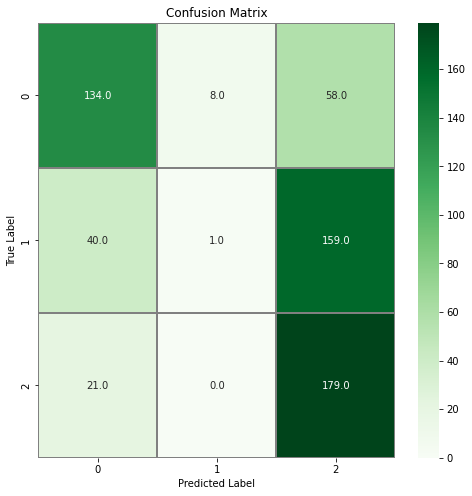

0.5233333333333333


In [18]:
acc_CNN, yhats_CNN = tta_evaluate_model(CNN, train_X_potsdam, train_Y_potsdam)
print(acc_CNN)

### **Testing with EfficientNetB4 - RMS Prop**

19/19 [==============================] - 6s 143ms/step - loss: 1.2365 - acc: 0.5900
[1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 2 0 2 2 0 0 0 2 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 2 0 1 0 0 0 0 0 2 1 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 2 2 2 0 0 0 0 2 0 1 1 2 2 1 0 0 0 2 1 2 1 0 2 0 0 0 0 0 1 0 1 1 0 2 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 0 1 2 1 1 0 0 1 2 0 0 0
 0 0 2 2 0 0 0 2 0 0 1 0 0 1 0 0 0 0 2 0 1 0 2 0 0 0 2 0 0 0 1 2 2 0 2 0 0
 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 1
 2 1 1 1 0 0 1 0 2 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 2 0 2 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 2 2 1 2 1 0 0 0 0 2 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 2 1 2 2 0 0
 1 0 1 2 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 2 0 1 0 2 2 0 0 0 0 2 0 1 0 0 0 0 0 1 2 2 0 0 0 0 0 0 2 2
 2 0 2 0 2 1 0 0 2 0 0 0 1 0 0 1 2 0 2 0 0 0 2 1 0 0 0 0 1 0 0 0 0 2 0 2 0
 0 0 2 0 0 0 0 1 2 2 1 0 2 0 2 0 1 0 1 0 2 0 0 0 0 0 2 0 1 0 0 0 2 0 2 1 0
 0 0 1 0 0 0 0 0

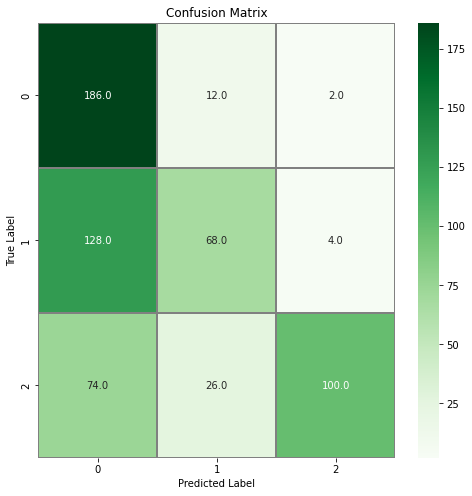

[[1.7506206e-01 8.2493794e-01 1.2315331e-08]
 [7.4745859e-03 9.9250549e-01 1.9919667e-05]
 [7.0906919e-01 2.9093015e-01 6.7006852e-07]
 ...
 [9.9689591e-01 3.0982203e-03 5.8786600e-06]
 [7.0985663e-01 1.2616965e-02 2.7752641e-01]
 [9.9871159e-01 1.2860114e-03 2.3217613e-06]]
ROC_AUC score for 3 models: {0: 0.9022937499999999, 1: 0.8139375, 2: 0.9423250000000001}


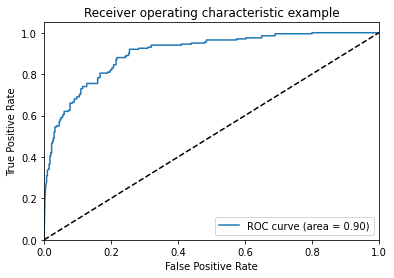

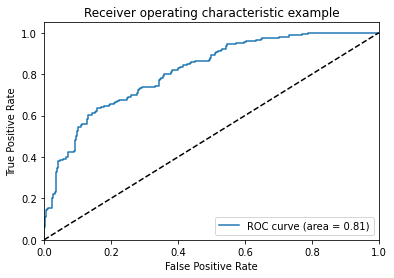

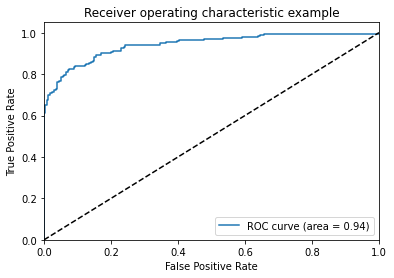

In [19]:
EfficientNetRMS = tf.keras.models.load_model('../input/weights-mod-dataset/weights-mod-data/EfficientNetB4-finetuning-bs16-RMS-mod')
test_loss_EfficientNetRMS = EfficientNetRMS.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_EfficientNetRMS = EfficientNetRMS.predict(train_X_potsdam)
pred_labels_EfficientNetRMS = np.argmax(predictions_EfficientNetRMS, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_EfficientNetRMS)
print(test_labels)
print(test_loss_EfficientNetRMS)
print_classification_report(test_labels, pred_labels_EfficientNetRMS)
plot_confusion_matrix(test_labels, pred_labels_EfficientNetRMS)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with EfficientNetB4 - RMS Prop**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 

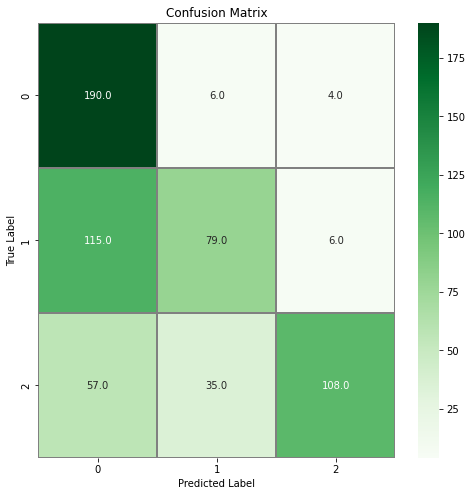

0.6283333333333333


In [20]:
acc_EfficientNetRMS, yhats_EfficientNetRMS = tta_evaluate_model(EfficientNetRMS, train_X_potsdam, train_Y_potsdam)
print(acc_EfficientNetRMS)

### **Testing with EfficientNetB4 - Adam**

19/19 [==============================] - 5s 122ms/step - loss: 1.2871 - acc: 0.6650
[1 0 1 1 2 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 2 2 1 2 1 0 0 2 0 0 1 0 2
 0 0 0 1 0 0 0 0 0 0 2 0 2 0 0 1 0 2 0 0 0 0 2 1 0 0 0 0 1 1 0 2 0 0 0 2 0
 2 1 0 2 0 1 0 1 2 0 0 0 2 2 1 0 2 0 2 1 2 1 0 2 0 0 1 2 0 1 0 0 0 0 1 1 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 2 0 0 2 1 2 2 2 1 1 0 0 1 0 0 0 2
 0 0 2 2 0 0 0 2 0 0 1 0 0 2 0 1 0 0 2 0 1 0 0 1 0 0 2 0 0 0 2 2 2 0 2 0 1
 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 2 1 0 0 0 2 1
 2 1 1 0 0 1 0 0 2 1 0 0 1 0 2 2 2 0 0 0 1 0 1 2 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 1 2 0 1 2 1 0 0 0 0 2 0 0 0 0 1 0 1 2 1 0 1 0 2 2 1 2 0 2 2 0 1
 1 0 1 2 0 0 1 0 2 0 1 1 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0
 0 1 0 2 1 0 1 0 2 0 2 0 0 2 0 0 0 0 2 0 1 0 0 0 0 0 2 2 2 1 0 0 0 0 0 2 2
 2 0 2 0 2 1 0 0 2 0 0 0 1 0 0 1 2 0 2 0 0 0 2 1 0 0 0 0 1 1 0 1 0 1 1 2 0
 1 0 2 0 1 0 0 0 0 2 1 0 0 2 2 0 0 0 0 1 2 0 0 0 0 0 2 0 1 2 0 1 2 0 2 1 0
 0 0 1 0 2 0 0 0

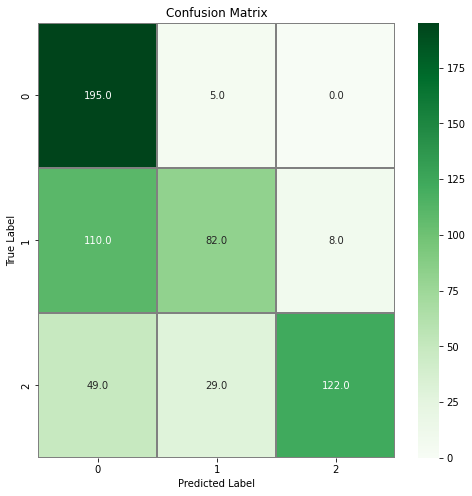

[[1.7506206e-01 8.2493794e-01 1.2315331e-08]
 [7.4745859e-03 9.9250549e-01 1.9919667e-05]
 [7.0906919e-01 2.9093015e-01 6.7006852e-07]
 ...
 [9.9689591e-01 3.0982203e-03 5.8786600e-06]
 [7.0985663e-01 1.2616965e-02 2.7752641e-01]
 [9.9871159e-01 1.2860114e-03 2.3217613e-06]]
ROC_AUC score for 3 models: {0: 0.9022937499999999, 1: 0.8139375, 2: 0.9423250000000001}


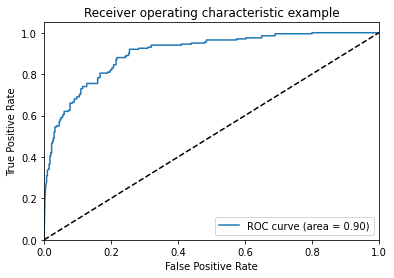

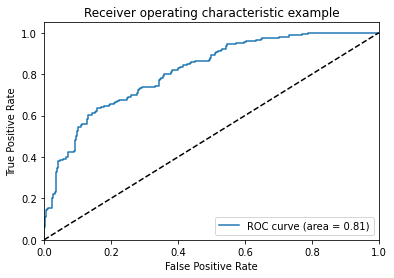

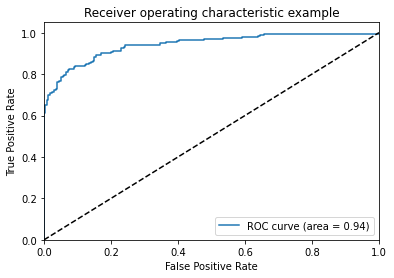

In [21]:
EfficientNetAdam = tf.keras.models.load_model('../input/weights-mod-dataset/weights-mod-data/EfficientNetB4-finetuning-bs16-Adam-mod')
test_loss_EfficientNetAdam = EfficientNetAdam.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_EfficientNetAdam = EfficientNetAdam.predict(train_X_potsdam)
pred_labels_EfficientNetAdam = np.argmax(predictions_EfficientNetAdam, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_EfficientNetAdam)
print(test_labels)
print(test_loss_EfficientNetAdam)
print_classification_report(test_labels, pred_labels_EfficientNetAdam)
plot_confusion_matrix(test_labels, pred_labels_EfficientNetAdam)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with EfficientNetB4 - Adam**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 

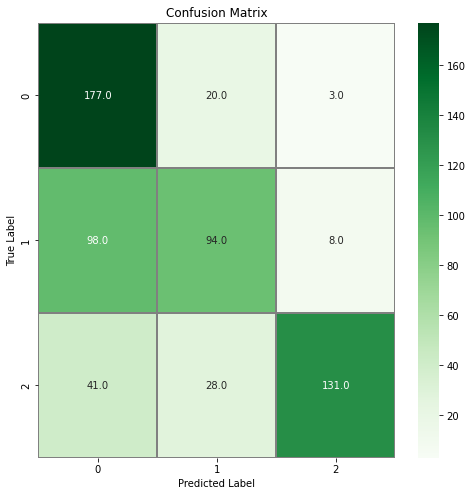

0.67


In [22]:
acc_EfficientNetAdam, yhats_EfficientNetAdam = tta_evaluate_model(EfficientNetAdam, train_X_potsdam, train_Y_potsdam)
print(acc_EfficientNetAdam)

### **Testing with VGG**

19/19 [==============================] - 2s 79ms/step - loss: 3.7484 - acc: 0.6067
[0 0 1 0 2 1 0 0 0 0 0 0 1 0 0 2 1 0 2 0 2 0 0 0 2 0 1 2 0 0 0 2 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 2 0 2 0 0 1 0 2 0 0 0 0 2 1 0 1 0 0 0 0 0 2 0 0 2 2 0
 2 1 0 2 0 0 0 1 1 0 1 0 2 2 1 0 2 0 2 1 2 1 0 2 0 0 0 2 0 1 0 0 0 0 2 1 2
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 2 0 0 2 2 0 0 0 0 1 0 0 0 2
 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0 0 0 0 2 0 0 0 2 2 2 0 1 0 0
 2 1 0 1 0 2 2 0 0 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0
 0 1 2 0 0 1 1 0 2 1 0 0 1 0 0 1 2 0 0 1 1 1 1 1 0 2 0 0 1 0 0 0 0 0 1 2 0
 0 0 0 0 0 1 2 2 1 2 1 0 1 0 2 2 0 0 0 0 0 0 2 0 0 0 1 0 2 0 2 1 2 2 2 0 2
 0 0 1 2 0 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 1 0 0 0 2 0
 0 2 0 2 1 0 0 0 2 0 0 0 1 1 0 0 0 0 2 0 2 0 1 0 1 0 2 2 2 0 0 0 0 0 0 2 2
 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 2 0 2 0 1 1 2 0
 2 0 2 0 0 0 0 1 0 2 1 0 0 2 2 0 1 0 0 1 2 0 0 0 0 0 2 0 0 1 0 0 2 0 2 2 0
 0 0 1 0 2 0 2 1 

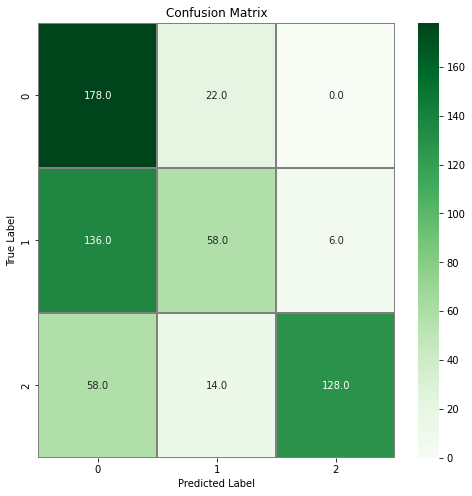

[[1.7506206e-01 8.2493794e-01 1.2315331e-08]
 [7.4745859e-03 9.9250549e-01 1.9919667e-05]
 [7.0906919e-01 2.9093015e-01 6.7006852e-07]
 ...
 [9.9689591e-01 3.0982203e-03 5.8786600e-06]
 [7.0985663e-01 1.2616965e-02 2.7752641e-01]
 [9.9871159e-01 1.2860114e-03 2.3217613e-06]]
ROC_AUC score for 3 models: {0: 0.9022937499999999, 1: 0.8139375, 2: 0.9423250000000001}


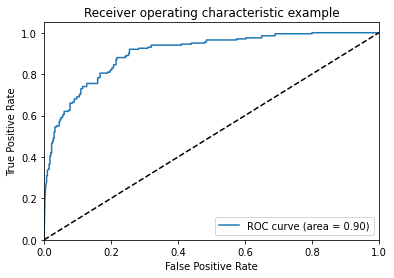

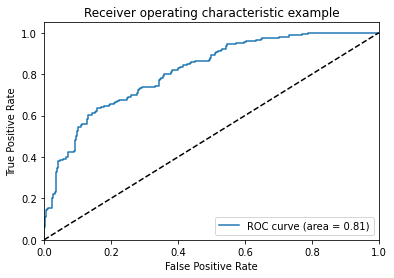

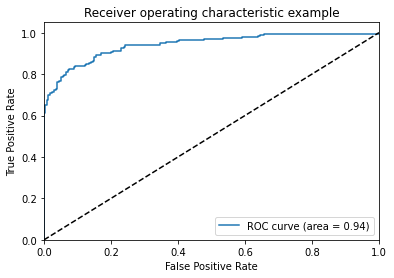

In [24]:
VGG = tf.keras.models.load_model('../input/weights-mod-dataset/weights-mod-data/VGG16-finetuning-RMS-bs4-mod')
test_loss_VGG = VGG.evaluate(train_X_potsdam, train_Y_potsdam)
predictions_VGG = VGG.predict(train_X_potsdam)
pred_labels_VGG = np.argmax(predictions_VGG, axis = 1)
test_labels = np.argmax(train_Y_potsdam, axis = 1)
print(pred_labels_VGG)
print(test_labels)
print(test_loss_VGG)
print_classification_report(test_labels, pred_labels_VGG)
plot_confusion_matrix(test_labels, pred_labels_VGG)
plot_AUC_ROC(ResNet, train_X_potsdam, train_Y_potsdam)

### **TTA with VGG**

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 

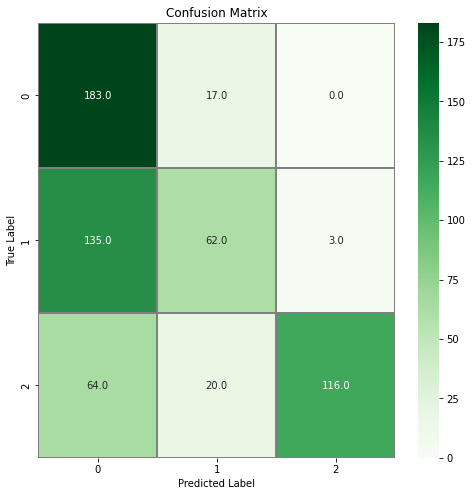

0.6016666666666667


In [25]:
acc_VGG, yhats_VGG = tta_evaluate_model(VGG, train_X_potsdam, train_Y_potsdam)
print(acc_VGG)

### **Majority Voting**

- Combining ResNet, EfficientNet-RMSProp, EfficientNet-Adam
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max


In [26]:
def max_voting(preds):
    idxs = np.argmax(preds, axis = 1)
    return np.take_along_axis(preds, idxs[:,None], axis = 1)

Shape of combined results: (600, 3)


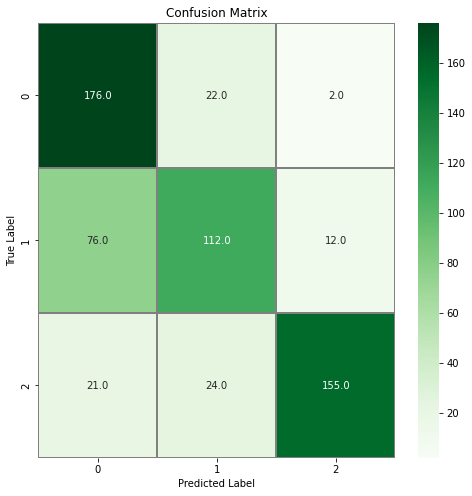

0.7383333333333333


In [27]:
combined_preds_ree = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_EfficientNetAdam[i]
    combined_preds_ree.append([res1, res2, res3])
    

combined_preds_ree = np.array(combined_preds_ree)
print("Shape of combined results: {0}".format(combined_preds_ree.shape))

pred_results_ree = max_voting(combined_preds_ree)

plot_confusion_matrix(test_labels, pred_results_ree)
print(accuracy_score(test_labels, pred_results_ree))

- Combining ResNet, EfficientNet-RMSProp, VGG
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max

Shape of combined results: (600, 3)


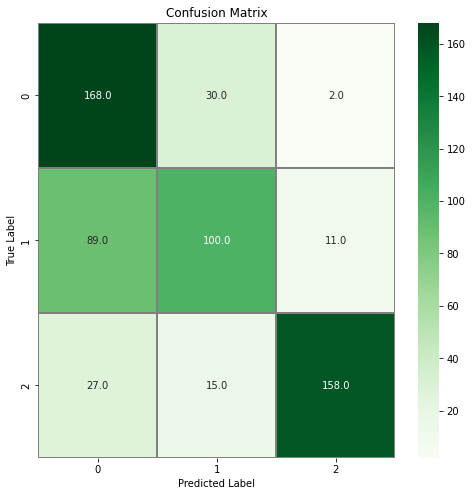

0.71


In [28]:
combined_preds_rev = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_VGG[i]
    combined_preds_rev.append([res1, res2, res3])
    

combined_preds_rev = np.array(combined_preds_rev)
print("Shape of combined results: {0}".format(combined_preds_rev.shape))

pred_results_rev = max_voting(combined_preds_rev)

plot_confusion_matrix(test_labels, pred_results_rev)
print(accuracy_score(test_labels, pred_results_rev))

- Combining ResNet, EfficientNet-RMSProp, CNN
- First step -> Get results from all 3
- Create 600 * 3 list
- convert to numpy
- then predict max

Shape of combined results: (600, 3)


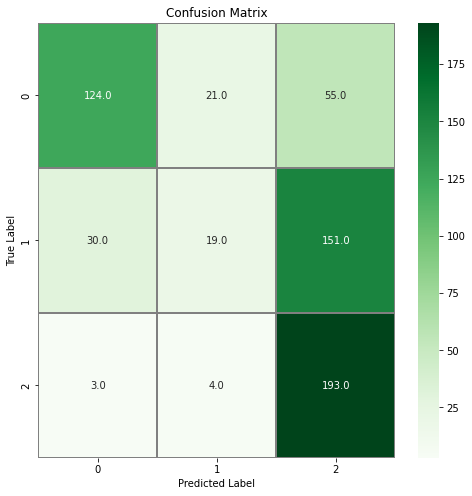

0.56


In [29]:
combined_preds_rec = []
for i in range(0,600,1):
    res1 = pred_labels_ResNet[i]
    res2 = pred_labels_EfficientNetRMS[i]
    res3 = pred_labels_CNN[i]
    combined_preds_rec.append([res1, res2, res3])
    

combined_preds_rec = np.array(combined_preds_rec)
print("Shape of combined results: {0}".format(combined_preds_rec.shape))

pred_results_rec = max_voting(combined_preds_rec)

plot_confusion_matrix(test_labels, pred_results_rec)
print(accuracy_score(test_labels, pred_results_rec))